Welcome to Experimental Design with Python!

The following scripts aim to provide you, as a forestry engineer, with the necessary statistical tools for the proper conduct of experiments.

The main goal is for you to have fun and learn to program effectively. To achieve this, we will start by enhancing your inferential foundations.

# Chapter 1: Statistical Inference

Before we begin, in this course, we will download the libraries scipy, numpy, and pandas. To do this, we will use the "pip" command to download the external package locally and "import" to activate the package.

To avoid typing the package name repeatedly, it is convenient to give it a nickname. That's why the use of "as" allows this functionality.

In [ ]:
!pip install scipy
# The exclamation mark prevents reinstalling the program if it's already installed
!pip install numpy
!pip install pandas
!pip install plotnine
import scipy as sp
import numpy as np
import pandas as pd
import plotnine as p9


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 1.1 Univariate Distributions: Hypotheses about the Mean

When we have a dataset with frequencies, **the relative frequency allows us to naturally calculate the probability of the data**. Once this data is calculated, it can be fitted to a probability distribution, which is useful because it allows us to **make generalizations about the data**.

To fit this function, it is imperative to calculate or theorize about two fundamental parameters: **the mean (a measure of centrality) and the variance (a measure of data dispersion)**, if possible.

We will start with the mean, which ultimately aims to identify the most probable data point, and it is very common to theorize about it in most scientific studies.





In [2]:
"""
Objectives:
1. Create a seed to obtain the same results
2. Generate a random probability distribution
3. Display the mean in a graph
4. Test it scientifically
"""
import numpy as np
import pandas as pd
import plotnine as p9

np.random.seed(7)
# Creating the distribution
variable_game = np.random.binomial(n=20, p=0.9, size=40)
# Printing the values of the variable
print("Variable values:", variable_game)
# Calculating the centrality parameter E(x) = n*p
expected_value = 20 * 0.9
# Printing the expected value
print("The expected value is:", expected_value)
# Storing it in a database
data = pd.DataFrame(variable_game)
# Plotting the variable
plot = p9.ggplot(data) + p9.aes('variable_game') + p9.geom_density() + p9.geom_vline(xintercept=expected_value)  #new line
print(plot)
"""
When looking at this data, would you dare to claim that at a population level,
given the sample data, the mean is at that value?
The answer is yes because we know the probability distribution of these values.
However, in the real world, this doesn't happen. In the real world, tests are required
because we don't know the true parameter governing our distribution
since we don't have access to the entire population or know the probability distribution
function of the data. Therefore, we must infer it.
"""


NameError: ignored

# T-test
The test that is particularly used for small samples is the t-test, which allows us to estimate whether there is statistically significant evidence to support this.

The criterion commonly used for this decision is the p-value. When the p-value is less than the significance level, it means there is no statistically significant evidence to support the null hypothesis.

In [ ]:
"""
Objectives

Import the statistical package scipy.
Use the t-test to determine if there is enough statistical evidence to claim that the expected value is the mean of our distribution or different from it.
Create a function that serves as a decision criterion.
"""
# First, import the statistical package
from scipy import stats

# Perform the t-test
test = sp.stats.ttest_1samp(a=variable_game, popmean=expected_value)
print(test)

# Create a function to provide the decision rule
def criterion(p_value, significance):
    if p_value < significance:
        print("There is enough statistical evidence to claim that the sample mean is different from the population mean. p-value:", p_value)
    else:
        print("There is not enough statistical evidence to claim that the sample mean is different from the population mean. p-value:", p_value)

p_value = test[1]
criterion(p_value=p_value, significance=0.025)

# As we can see, the test supports our initial claims, which is consistent with the graphical evidence we have.


Ttest_1sampResult(statistic=0.12857849351790962, pvalue=0.8983519709824662)
no existe evidencia estadistica suficiente para afirmar que la media  de la muestra es diferente de la media, p-valor: 0.8983519709824662


'\nPor lo que vemos, podemos ver que la prueba soporta nuestras \nafirmaciones iniciales, algo consistente con la evidencia gráfica\nque poseemos  \n'

la media es: 1789.0856666721943



'\ncomo ves la media parece una buena estimación pero\nharemos el ejercicio de ver que tan cerca esta del verdadero parametro\nhipotesis nula \nHo:media=1789.0856666721943\n'

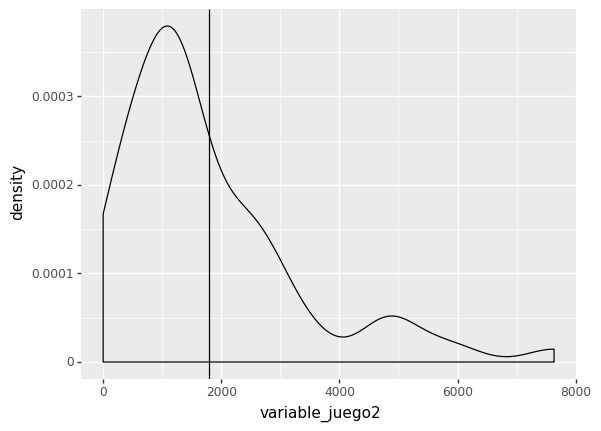

In [ ]:
"""
Objectives

    Understand why statistics are important.
    Observe the graphical evidence of the need for statistics.


"""



# Now, let's consider another distribution
np.random.seed(7)
variable_game2 = np.random.gamma(shape=1, scale=2000, size=60)
# The parameter to evaluate will be shape * scale = 1 * 2000 = 2000
mean = variable_juego2.mean()
# Print the expected value
print("The mean is:", mean)
# Store it in a data frame
data = pd.DataFrame(variable_game2)
# Plot the variable
dist_plot = p9.ggplot(data) + p9.aes('variable_game2') + p9.geom_density() + p9.geom_vline(xintercept=mean)  #new line
print(dist_plot)

"""
As you can see, the mean appears to be a good estimate, but we will exercise to see how close it is to the true parameter.
Null hypothesis:
Ho: mean = 1789.0856666721943
"""


Ttest_1sampResult(statistic=0.0, pvalue=1.0)
no existe evidencia estadistica suficiente para afirmar que la media  de la muestra es diferente de la media, p-valor: 1.0



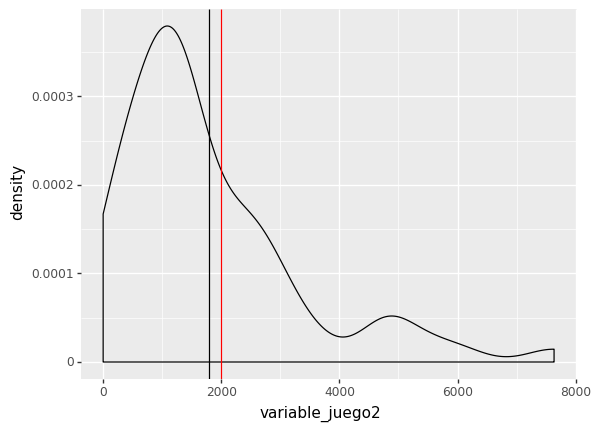

In [ ]:
"""
Comparing it with the true parameter through the tests, we can confirm that the mean fits well with the data. 
Only through statistics can we have that sense of confidence.

"""


test1 = sp.stats.ttest_1samp(a=variable_juego2, popmean=media, alternative="two-sided")
print(prueba1)
# Now you can see that the p-value is 1
p_value = prueba1[1]
criterion(p_value=p_value, significance=0.025)
valor_esperado = 2000 * 1

# Viewing the true parameter
plot = p9.ggplot(data) + p9.aes('variable_juego2') + p9.geom_density() + p9.geom_vline(xintercept=valor_esperado, colour="red") + p9.geom_vline(xintercept=media)
print(plot)


In [ ]:
"""
testing against the true parameter (2000), the statistic acts correctly
"""
test=sp.stats.ttest_1samp(a=variable_game2,popmean=expected_value)
print(prueba)
p_value=prueba[1]
criterion(p_value,0.025)


Ttest_1sampResult(statistic=-1.0462441288881543, pvalue=0.29971581307241074)
no existe evidencia estadistica suficiente para afirmar que la media  de la muestra es diferente de la media, p-valor: 0.29971581307241074


# one-tailed-test
Many times it is only necessary to test on a value greater than or less than in this case the use will be one-tailed.
Next, the decision rule is left



Ttest_1sampResult(statistic=-137.36261031450053, pvalue=0.0)
existe evidencia estadistica suficiente para rechazar la hipotesis nula en favor de la  alternativa. p valor: 0.0


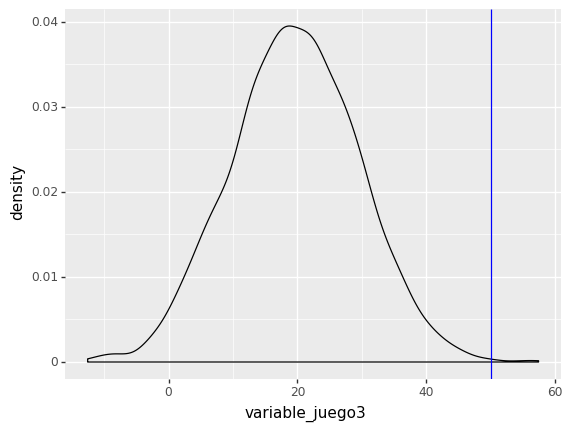

In [ ]:
# to see if it is less than a criterion
# we will generalize:
def criterion(p_value, significance):
  if p_value < significance:
    print("there is sufficient statistical evidence",
          "to reject the null hypothesis in favor of the ",
          "alternative.",
     "p value:",p_value )
  else:
    print("there is not enough statistical evidence",
          "to reject the null hypothesis in favor of the alternative",
     "p-value:",p_value)
    
"""
Example
minor:
Ho: mean = k
H1: mean < k
"""

np.random.seed(7)
# theorizing that: mean < 50
game_variable3=np.random.normal(loc=20,scale=10,size=2000)
data=pd.DataFrame(game_variable3)
average=50
# graphing the variable
dist_plot=p9.ggplot(data)+p9.aes('game_variable3')+p9.geom_density()+p9.geom_vline(xintercept=media,colour="blue") #new line
print(dist_plot)
# testing it with the statistician
test=sp.stats.ttest_1samp(a=game_variable3,popmean=media,alternative="less")
print(test)
p_value=test[1]
p_value
criterion(p_value,0.05)# affirmatively the mean is less than 50


Ttest_1sampResult(statistic=-137.36261031450053, pvalue=1.0)
1.0
no existe evidencia estadistica suficiente para rechazar la hipotesis nula en favor de la alternativa p-valor: 1.0


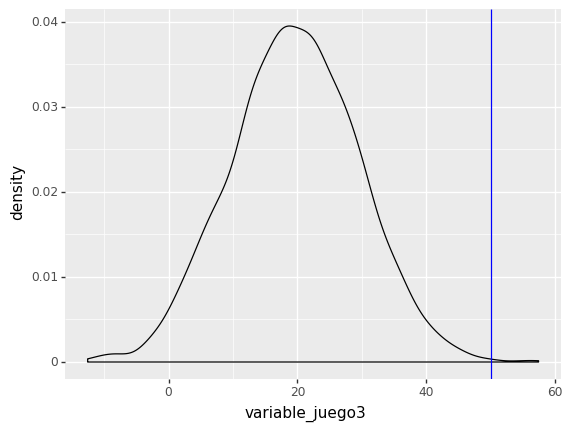

In [ ]:
# Greater than
"""
Ho: mean = k
H1: mean > k
"""


np.random.seed(7)
# theorizing that: mean > 50
game_variable3=np.random.normal(loc=20,scale=10,size=2000)
data=pd.DataFrame(game_variable3)
average=50
# graphing the variable
dist_plot=p9.ggplot(data)+p9.aes('game_variable3')+p9.geom_density()+p9.geom_vline(xintercept=media,colour="blue") #new line
print(dist_plot)
# testing it with the statistician
test=sp.stats.ttest_1samp(a=game_variable3,popmean=media,alternative="greater")
print(test)
p_value=test[1]
print(p_value)

criterion(p_value,0.05)
# the statistician effectively shows that there is no evidence to affirm
# that the mean > 50

#2 Different Distributions:
This type of test is generally used to verify whether the means of two distributions are different.


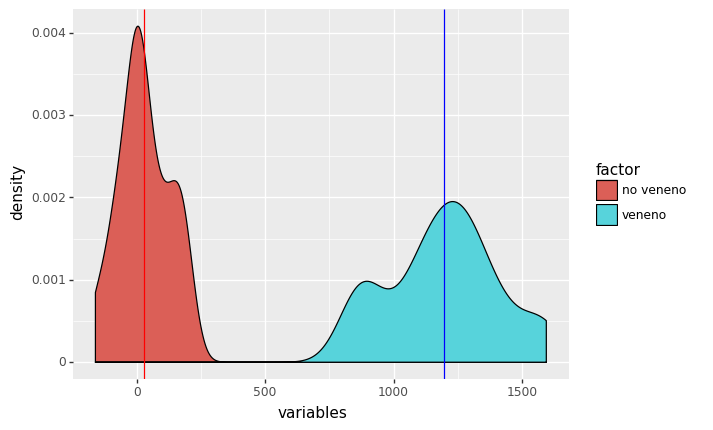

In [ ]:
"""
Goals:
1. See how different the means of two distributions are graphically
2. Validate it with the statistician

Let's assume that we have two distributions

"""
np.random.seed(7)
variable1=np.random.gamma(shape=30,scale=40,size=30)
variable2=np.random.normal(loc=30,scale=100,size=30)
factor=np.concatenate((np.repeat("poison",30),np.repeat("non-poison",30)),axis=0)
variables=np.concatenate((variable1,variable2),axis=0)
data={"variables":variables,"factor":factor}
data=pd.DataFrame(data)
mean1=variable1.mean()
mean2=variable2.mean()
plot=p9.ggplot(data)+p9.aes(x="variables",fill="factor")+p9.geom_density(alpha=1)+p9.geom_vline(xintercept=media1,colour="blue")+ p9.geom_vline(xintercept=media2,color="red")
print(plot)

In [ ]:
"""
Now we compare the averages that are clearly different,
Here the null hypothesis is that there is no difference in means

Ho: mean1=mean2
H1: mean1 != mean2
"""
test=sp.stats.ttest_rel(a=variable1,b=variable2,alternative="two-sided")
p_value=test[1]
criterion(p_value,0.025)# the test shows that they are different

existe evidencia estadistica suficiente para rechazar la hipotesis nula en favor de la  alternativa. p valor: 1.133997214268433e-21


In [ ]:
"""
Now we compare the means if one is smaller

Ho: mean1 = mean2
H1: mean1 < mean2
"""


# to see if it is less than a criterion, the test rejects it
test=sp.stats.ttest_rel(a=variable1,b=variable2,alternative="less")
p_value=test[1]
print(p_value)
criterion(p_value,0.05)

1.0
no existe evidencia estadistica suficiente para rechazar la hipotesis nula en favor de la alternativa p-valor: 1.0


In [ ]:
"""
Now we compare the means if one is greater

Ho: mean1 = mean2
H1: mean1 > mean2
"""


# to see if it is less than a criterion, the test rejects it
test=sp.stats.ttest_rel(a=variable1,b=variable2,alternative="greater")
p_value=test[1]
print(p_value)
criterion(p_value,0.05) # which is true

5.669986071342165e-22
existe evidencia estadistica suficiente para rechazar la hipotesis nula en favor de la  alternativa. p valor: 5.669986071342165e-22
